### Sensitivity analysis on Various Studies and Variables

In this notebook, we conduct a Sensitivity analysis on studies to examine the consistency of the conclusion derived by meta-analysis. The main steps include:

1. Data extraction from the studies.
2. Quality assessment to classify studies to high, moderate and low quality.
3. Meta-analysis on each quality groups to pool the correlation coefficients.
4. Visualization using a forest plot.

Source:
1.  Giuliani A, Milan Manani S, Crepaldi C, Domenici A, Gastaldon F, Corradi V, et al. Intraperitoneal Pressure in Polycystic and Non-Polycystic Kidney Disease Patients, Treated by Peritoneal Dialysis. Blood Purification. 2020;49(6): 670–676. https://doi.org/10.1159/000506177.
2.  Castellanos LB, Clemente EP, Cabañas CB, Parra DM, Contador MB, Morera JCO, et al. Clinical Relevance of Intraperitoneal Pressure in Peritoneal Dialysis Patients. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2017;37(5): 562–567. https://doi.org/10.3747/pdi.2016.00267.
3.  De Jesús Ventura M, Amato D, Correa–Rotter R, Paniagua R, Mexican Nephrology Collaborative Study Group. Relationship between Fill Volume, Intraperitoneal Pressure, Body Size, and Subjective Discomfort Perception in CAPD Patients. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2000;20(2): 188–193. https://doi.org/10.1177/089686080002000205.
4.  Lauro V, Luccio F, Colaluca M, Francesco F, Pintauro A. Intraperitoneal hydrostatic pressure and volume in peritoneal dialysis patients. EDTNA-ERCA Journal. 1999;25(2): 16–17. https://doi.org/10.1111/j.1755-6686.1999.tb00023.x.
5.  Fischbach M, Terzic J, Provot E, Weiss L, Bergere V, Menouer S, et al. Intraperitoneal pressure in children: fill-volume related and impacted by body mass index. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2003;23(4): 391–394. 
6.  Scanziani R. Intraperitoneal hydrostatic pressure and flow characteristics of peritoneal catheters in automated peritoneal dialysis. Nephrology Dialysis Transplantation. 2003;18(11): 2391–2398. https://doi.org/10.1093/ndt/gfg353.
7.  Dejardin A, Robert A, Goffin E. Intraperitoneal pressure in PD patients: relationship to intraperitoneal volume, body size and PD-related complications. Nephrology Dialysis Transplantation. 2007;22(5): 1437–1444. https://doi.org/10.1093/ndt/gfl745.
8.  Outerelo MC, Gouveia R, Teixeira e Costa F, Ramos A. Intraperitoneal pressure has a prognostic impact on peritoneal dialysis patients. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2014;34(6): 652–654. https://doi.org/10.3747/pdi.2012.00192.
9.  Sigogne M, Kanagaratnam L, Mora C, Pierre M, Petrache A, Marcus C, et al. Identification of the Factors Associated With Intraperitoneal Pressure in ADPKD Patients Treated With Peritoneal Dialysis. Kidney International Reports. 2020;5(7): 1007–1013. https://doi.org/10.1016/j.ekir.2020.04.012.
10.  Rusthoven E, van der Vlugt ME, van Lingen-van Bueren LJ, van Schaijk TCJG, Willems HL, Monnens LAH, et al. Evaluation of intraperitoneal pressure and the effect of different osmotic agents on intraperitoneal pressure in children. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2005;25(4): 352–356. 
11.  Betancourt L, Pico S, Rojas E, Gordo MJ, Oliva JC, Almirall J, et al. Relationship between intraperitoneal pressure and the development of hernias in peritoneal dialysis: confirmation for the first time of a widely accepted concept. International Urology and Nephrology. 2023; https://doi.org/10.1007/s11255-023-03663-5.
12.  Aranda RA, Romão Jr. JE, Kakehashi E, Domingos W, Sabbaga E, Marcondes M, et al. Intraperitoneal pressure and hernias in children on peritoneal dialysis. Pediatric Nephrology. 2000;14(1): 0022–0024. https://doi.org/10.1007/s004670050005.


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

data = {
    'study_id': ['Giuliani2020', 'Castellanos2017', 'Ventura2000', 'Lauro1999', 'Fishbach2003',
                 'Scanziani2003', 'Dejardin2007', 'Outerelo2014', 'Sigogne2020', 'Rusthoven2005',
                 'Betancourt2023', 'Aranda2000'],
    'n': [77, 49, 81, 30, 17, 34, 61, 54, 60, 30, 124, 24],
    'r_bmi': [0.42, 0.69, np.nan, np.nan, 0.82, 0.53, 0.28, 0.346, 0.251, np.nan, 0.569, np.nan],
    'r_bsa': [0.2, 0.45, np.nan, np.nan, 0.34, np.nan, 0.11, 0.05, 0.148, np.nan, np.nan, np.nan],
    'r_ipv': [-0.13, np.nan, np.nan, np.nan, np.nan, np.nan, 0.96, np.nan, 0.107, np.nan, 0.113, np.nan],
    'r_ipv_bsa': [-0.25, np.nan, -0.319, 0.355, 0.36, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'r_age': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.1, 0.141, 0.009, np.nan, 0.29, np.nan],
    'r_cci': [np.nan, 0.387, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.344, np.nan],
    'quality_score': [6, 8, 5, 3, 6, 4, 7, 6, 7, 3, 8, 5]
}



The functions we use for data cleaning and meta-analysis will be the same as in `meta_analysis.ipynb`

In [2]:
def extract_valid_data(data, r_key):
    valid_data = {'study_id': [], 'n': [], 'r': []}
    for i, r in enumerate(data[r_key]):
        if not np.isnan(r):
            valid_data['study_id'].append(data['study_id'][i])
            valid_data['n'].append(data['n'][i])
            valid_data['r'].append(r)
    return valid_data

def perform_meta_analysis(valid_data):
    valid_data['z'] = 0.5 * np.log((1 + np.array(valid_data['r'])) / (1 - np.array(valid_data['r'])))
    valid_data['var_z'] = 1 / (np.array(valid_data['n']) - 3)
    w = 1 / np.array(valid_data['var_z'])
    z_bar = np.sum(w * valid_data['z']) / np.sum(w)
    k = len(valid_data['z'])  
    Q = np.sum(w * (valid_data['z'] - z_bar)**2)
    # Calculating p-value for Q
    p_value_Q = 1 - stats.chi2.cdf(Q, k-1)

    if Q == k - 1:
        I2 = 0
    else:
        I2 = max(0, ((Q - (k - 1)) / Q) * 100)

    denominator = (np.sum(w) - (np.sum(w**2) / np.sum(w)))
    tau2 = 0 if denominator == 0 else (Q - (k - 1)) / denominator
    tau2 = max(0, tau2)  # Ensure non-negativity
    w_RE = 1 / (np.array(valid_data['var_z']) + tau2)
    w_RE_sum = np.sum(w_RE)
    if w_RE_sum == 0:
        z_bar_RE = 0
        weights_percent = [0] * k
    else:
        z_bar_RE = np.sum(w_RE * valid_data['z']) / w_RE_sum
        weights_percent = (w_RE / w_RE_sum) * 100

    se_z_bar_RE = np.sqrt(1 / np.sum(w_RE)) if w_RE_sum != 0 else 0
    ci_z_bar_RE = (z_bar_RE - 1.96*se_z_bar_RE, z_bar_RE + 1.96*se_z_bar_RE)

    # Back Transformation to r Scale
    r_bar_RE = (np.exp(2 * z_bar_RE) - 1) / (np.exp(2 * z_bar_RE) + 1)
    ci_r_bar_RE = ((np.exp(2 * ci_z_bar_RE[0]) - 1) / (np.exp(2 * ci_z_bar_RE[0]) + 1),
                   (np.exp(2 * ci_z_bar_RE[1]) - 1) / (np.exp(2 * ci_z_bar_RE[1]) + 1))

    return r_bar_RE, ci_r_bar_RE, valid_data, weights_percent, I2, Q, p_value_Q

We will divide the study to 3 groups of qualities:
- High Quality: 7-9 stars
- Moderate Quality: 4-6 stars
- Low Quality: 0-3 stars

In [3]:
# Grouping studies by quality
high_quality_ids = [data['study_id'][i] for i in range(len(data['study_id'])) if data['quality_score'][i] >= 7]
moderate_quality_ids = [data['study_id'][i] for i in range(len(data['study_id'])) if 4 <= data['quality_score'][i] < 7]
low_quality_ids = [data['study_id'][i] for i in range(len(data['study_id'])) if data['quality_score'][i] < 4]

# Function to filter data based on quality ids
def filter_data_by_ids(ids, data):
    filtered_data = {key: [] for key in data.keys()}  # Initializing a dictionary with the same keys
    for i in range(len(data['study_id'])):
        if data['study_id'][i] in ids:
            for key in data.keys():
                filtered_data[key].append(data[key][i])
    return filtered_data

# Extract r_BMI for each quality group
high_quality_data = filter_data_by_ids(high_quality_ids, data)
moderate_quality_data = filter_data_by_ids(moderate_quality_ids, data)
low_quality_data = filter_data_by_ids(low_quality_ids, data)

By using the same DerSimonian and Laird random effects model, pooled effect for each variable in every quality group of studies are calculated

In [4]:
# List of variables to perform meta-analysis on
variables = ['r_bmi', 'r_bsa', 'r_ipv', 'r_ipv_bsa', 'r_age', 'r_cci']

# Perform meta-analysis on each variable for each quality group and save results
results = {'high_quality': {}, 'moderate_quality': {}, 'low_quality': {}}

for var in variables:
    for quality, quality_data in zip(['high_quality', 'moderate_quality', 'low_quality'],
                                     [high_quality_data, moderate_quality_data, low_quality_data]):
        try:
            valid_data = extract_valid_data(quality_data, var)
            if len(valid_data['r']) > 0:
                r_bar_RE, ci_r_bar_RE, _, weights_percent, I2, Q, p_value_Q = perform_meta_analysis(valid_data)
                results[quality][var] = {
                    'Effect Size': r_bar_RE,
                    'CI': ci_r_bar_RE,
                    'Weights Percent': weights_percent,
                    'I2': I2,
                    'Q': Q,
                    'p_value_Q': p_value_Q
                }
            else:
                results[quality][var] = np.nan
        except Exception as e:
            results[quality][var] = np.nan

results

{'high_quality': {'r_bmi': {'Effect Size': 0.4696997472119959,
   'CI': (0.2438863647659205, 0.6472014560086072),
   'Weights Percent': array([23.07751417, 24.51488291, 24.41262536, 27.99497757]),
   'I2': 78.48907057886353,
   'Q': 13.946398787642456,
   'p_value_Q': 0.0029790285376590786},
  'r_bsa': {'Effect Size': 0.23513292032970282,
   'CI': (0.015539888509772028, 0.4330874243543071),
   'Weights Percent': array([30.96341026, 34.65616975, 34.38041999]),
   'I2': 52.222063112300944,
   'Q': 4.186032571270196,
   'p_value_Q': 0.12331462217264677},
  'r_ipv': {'Effect Size': 0.6172307390004851,
   'CI': (-0.39382658404489274, 0.9524342132362894),
   'Weights Percent': array([33.23750414, 33.22757441, 33.53492145]),
   'I2': 98.64132451046125,
   'Q': 147.20218443618006,
   'p_value_Q': 0.0},
  'r_ipv_bsa': nan,
  'r_age': {'Effect Size': 0.15613848900569624,
   'CI': (-0.0230797922380787, 0.32563380066168285),
   'Weights Percent': array([29.11174765, 28.81261954, 42.07563281]),
   

### Results

### r_bmi:
1. **High quality studies**: Effect Size: 0.47 (0.24 - 0.65), I2 = 78.49%, p-value = 0.003
2. **Moderate quality studies**: Effect Size: 0.51 (0.30 - 0.67), I2 = 59.87%, p-value = 0.058
3. **Low quality studies**: Not available (NaN)

### r_bsa:
1. **High quality studies**: Effect Size: 0.24 (0.02 - 0.43), I2 = 52.22%, p-value = 0.123
2. **Moderate quality studies**: Effect Size: 0.16 (-0.004 - 0.32), I2 = 0%, p-value = 0.528
3. **Low quality studies**: Not available (NaN)

### r_ipv:
1. **High quality studies**: Effect Size: 0.62 (-0.39 - 0.95), I2 = 98.64%, p-value = 0.0
2. **Moderate quality studies**: Effect Size: -0.13 (-0.34 - 0.10), I2 = 0%, p-value not available (NaN)
3. **Low quality studies**: Not available (NaN)

### r_ipv_bsa:
1. **High quality studies**: Not available (NaN)
2. **Moderate quality studies**: Effect Size: -0.16 (-0.43 - 0.13), I2 = 66.57%, p-value = 0.050
3. **Low quality studies**: Effect Size: 0.35 (-0.006 - 0.63), I2 = 0%, p-value not available (NaN)

### r_age:
1. **High quality studies**: Effect Size: 0.16 (-0.02 - 0.33), I2 = 46.46%, p-value = 0.154
2. **Moderate quality studies**: Effect Size: 0.14 (-0.13 - 0.39), I2 = 0%, p-value not available (NaN)
3. **Low quality studies**: Not available (NaN)

### r_cci:
1. **High quality studies**: Effect Size: 0.36 (0.22 - 0.48), I2 = 0%, p-value = 0.774
2. **Moderate quality studies**: Not available (NaN)
3. **Low quality studies**: Not available (NaN)

### Summary

- High-quality studies show substantial heterogeneity.
- Moderate-quality studies also display some degree of heterogeneity, particularly for r_ipv_bsa.
- Low-quality studies have limited available data, making it difficult to draw robust conclusions for these groups.
- The presence of significant heterogeneity in certain variables suggests that the effects observed may vary considerably across different studies. This should be considered when interpreting the results.

In [5]:
from collections import defaultdict
plot_data = defaultdict(list)

# Iterate through each quality group and variable
for var, var_data in results.items():
    for var_group in ['r_bmi', 'r_bsa', 'r_ipv', 'r_ipv_bsa', 'r_age', 'r_cci']:
        gp_data = var_data.get(var_group)
        if gp_data and gp_data is not np.nan:
            # Extract data for plotting
            mean = gp_data['Effect Size']
            ci = gp_data['CI']
            ci_low, ci_high = ci[0], ci[1]
            I2 = gp_data['I2']
            p_value_Q = gp_data['p_value_Q']
            
            # Append data for plotting, grouped by var_group and quality_group
            plot_data[var_group].append((var, mean, ci_low, ci_high, I2, p_value_Q))


In [6]:
import pandas as pd
# Function to flatten the dictionary
def flatten_data(data, quality_label):
    flat_data = []
    for metric, details in data.items():
        row = {'Quality': quality_label, 'Metric': metric}
        if isinstance(details, dict):
            for detail_key, detail_value in details.items():
                if isinstance(detail_value, tuple):
                    row[detail_key + '_Lower'], row[detail_key + '_Upper'] = detail_value
                elif isinstance(detail_value, np.ndarray):
                    row[detail_key] = ', '.join(map(str, detail_value))
                else:
                    row[detail_key] = detail_value
        else:
            row['Effect Size'] = details
        flat_data.append(row)
    return flat_data

# Flattening all the data
flattened_data = []
for quality, metrics in results.items():
    flattened_data.extend(flatten_data(metrics, quality))

# Creating DataFrame
df = pd.DataFrame(flattened_data)
df.drop(['Weights Percent', 'Q'], axis=1, inplace=True)
# Displaying the DataFrame
pivoted_df = df.pivot_table(index=['Metric', 'Quality'])

# Specifying the order of metrics
metric_order = ['r_bmi', 'r_bsa', 'r_ipv', 'r_ipv_bsa', 'r_age', 'r_cci']
quality_order = ['high_quality', 'moderate_quality', 'low_quality']
pivoted_df = pivoted_df.reindex(index=pd.MultiIndex.from_product([metric_order, quality_order], names=['Metric', 'Quality']))

pivoted_df

CI_Lower  CI_Upper  Effect Size         I2  \
Metric    Quality                                                        
r_bmi     high_quality      0.243886  0.647201     0.469700  78.489071   
          moderate_quality  0.300941  0.674404     0.511431  59.865312   
          low_quality            NaN       NaN          NaN        NaN   
r_bsa     high_quality      0.015540  0.433087     0.235133  52.222063   
          moderate_quality -0.004291  0.316902     0.160553   0.000000   
          low_quality            NaN       NaN          NaN        NaN   
r_ipv     high_quality     -0.393827  0.952434     0.617231  98.641325   
          moderate_quality -0.343967  0.096801    -0.130000   0.000000   
          low_quality            NaN       NaN          NaN        NaN   
r_ipv_bsa high_quality           NaN       NaN          NaN        NaN   
          moderate_quality -0.425080  0.128597    -0.160872  66.574354   
          low_quality      -0.006049  0.634167     0.355000   0.000000   
r_age     high_quality     -0.023080  0.325634     0.156138  46.464487   
          moderate_quality -0.131739  0.393894     0.141000   0.000000   
          low_quality            NaN       NaN          NaN        NaN   
r_cci     high_quality      0.217116  0.480755     0.355999   0.000000   
          moderate_quality       NaN       NaN          NaN        NaN   
          low_quality            NaN       NaN          NaN        NaN   

                            p_value_Q  
Metric    Quality                      
r_bmi     high_quality       0.002979  
          moderate_quality   0.058209  
          low_quality             NaN  
r_bsa     high_quality       0.123315  
          moderate_quality   0.527652  
          low_quality             NaN  
r_ipv     high_quality       0.000000  
          moderate_quality        NaN  
          low_quality             NaN  
r_ipv_bsa high_quality            NaN  
          moderate_quality   0.050201  
          low_quality             NaN  
r_age     high_quality       0.154445  
          moderate_quality        NaN  
          low_quality             NaN  
r_cci     high_quality       0.774415  
          moderate_quality        NaN  
          low_quality             NaN

### Visualisation

<Figure size 1000x1200 with 0 Axes>

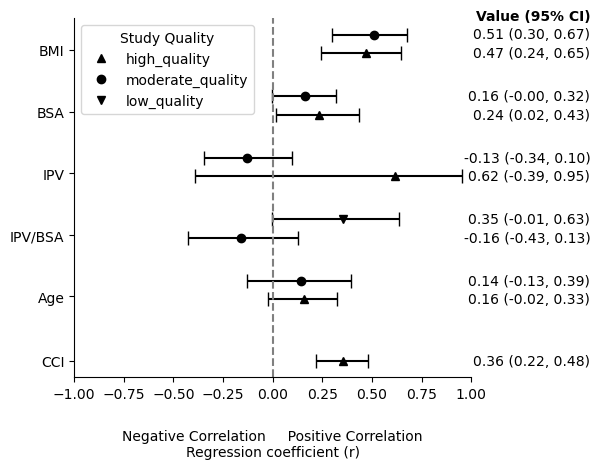

In [19]:
import matplotlib.pyplot as plt

# Define colors for different quality groups
quality_markers = {'high_quality': '^', 'moderate_quality': 'o', 'low_quality': 'v'}

# Define the order of variables for plotting
variable_order = {
    'r_bmi': 0,
    'r_bsa': 1,
    'r_ipv': 2,
    'r_ipv_bsa': 3,
    'r_age': 4,
    'r_cci': 5,
}

# Mapping for y-tick labels
y_tick_labels = {
    'r_bmi': 'BMI',
    'r_bsa': 'BSA',
    'r_ipv': 'IPV',
    'r_ipv_bsa': 'IPV/BSA',
    'r_age': 'Age',
    'r_cci': 'CCI'
}

# Create a figure for the forest plot
plt.figure(figsize=(10, len(plot_data) * 2))

# # Initialize y_pos for each variable group
y_pos = {variable_group: len(variable_order) - i for i, variable_group in enumerate(variable_order.keys())}
# Set a larger separation factor between variable groups
separation_between_variable_groups = 4.0  # Increase this value for more separation

# Initialize y_pos with increased separation for each variable group
initial_y_pos = len(variable_order)
for variable_group in variable_order.keys():
    y_pos[variable_group] = initial_y_pos
    initial_y_pos -= 1 + separation_between_variable_groups
    
# Create a figure and axes
fig, ax = plt.subplots()
# Removing the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create dummy plot elements for the legend
for quality_group, marker in quality_markers.items():
    plt.plot([], [], marker=marker, label=f'{quality_group}', color='black', linestyle='None')
# Add the legend to the plot
plt.legend(title='Study Quality', loc='upper left')

# Define y-tick positions and use the new labels
y_ticks = [y_pos[variable_group] + (len(plot_data[variable_group]) - 1) * 0.25 for variable_group in variable_order.keys()]

# Iterate through each variable group and plot the forest plot
for variable_group, variable_data in plot_data.items():
    for i, (quality_group, mean, ci_low, ci_high, I2, p_value_Q) in enumerate(variable_data):
        marker = quality_markers[quality_group]
        # Adjust the y position based on the variable group and quality group
        y = y_pos[variable_group] + i * 1.5  # Recent separation within quality group
        # Plot error bars using plt.errorbar
        plt.errorbar(mean, y, xerr=[[mean - ci_low], [ci_high - mean]], fmt=marker, color='black', label=f'{variable_group} - {quality_group}', capsize=5)
        ax.text(1.6, y, f"{mean:.2f} ({ci_low:.2f}, {ci_high:.2f})", ha='right', va='center', fontsize=10)

# Set yticks and labels for the variable groups
plt.yticks(y_ticks, [y_tick_labels[variable_group] for variable_group in variable_order.keys()])

# Set xlim
plt.xlim([-1, 1])
# Set title, xlabel, and legend
ax.set_xlabel('Negative Correlation     Positive Correlation\nRegression coefficient (r)', labelpad=20)
ax.text(1.6, len(plot_data) + 3, "Value (95% CI)", ha='right', va='center', fontsize=10, fontweight='bold')
# Add a grid
ax.axvline(0, color='gray', linestyle='--')

# Show the plot
plt.tight_layout()
plt.savefig('/mnt/d/pydatascience/pd-related trail/eipp_sr/Figure_4_1000dpi.png', dpi=1000)
plt.show()